In [1]:
import pandas as pd 
import numpy as np
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
dataset1 = "IPL Dataset(Assignment-2).csv"
dataset2 = "IPL Dataset(Assignment-2) - Winner.csv"

df1 = pd.read_csv(dataset1,header=0)
df2 = pd.read_csv(dataset2,header=0)

In [3]:
df1.head()

,ID,Season,City,Date,Team1,Team2,Toss winning tem,Toss decision,Result,Dl_applied
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0


In [4]:
df2.head()

,ID,Winner,Win by runs,Win by wickets,Player of match,Venue,Umpire1,Umpire2,Umpire3
0,1,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
df1.dtypes

ID                   int64
Season               int64
City                object
Date                object
Team1               object
Team2               object
Toss winning tem    object
Toss decision       object
Result              object
Dl_applied           int64
dtype: object

In [6]:
df2.dtypes

ID                   int64
Winner              object
Win by runs          int64
Win by wickets       int64
Player of match     object
Venue               object
Umpire1             object
Umpire2             object
Umpire3            float64
dtype: object

In [7]:
df1.isna().sum()

ID                  0
Season              0
City                0
Date                0
Team1               0
Team2               0
Toss winning tem    0
Toss decision       0
Result              0
Dl_applied          0
dtype: int64

In [8]:
df2.isna().sum()

ID                   0
Winner               0
Win by runs          0
Win by wickets       0
Player of match      0
Venue                0
Umpire1              1
Umpire2              1
Umpire3            119
dtype: int64

In [10]:
df = pd.merge(df1, df2, on = 'ID')
df.head(10)

,ID,Season,City,Date,Team1,Team2,Toss winning tem,Toss decision,Result,Dl_applied,Winner,Win by runs,Win by wickets,Player of match,Venue,Umpire1,Umpire2,Umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [11]:
df_categorical = df.select_dtypes(exclude=[np.number])
df_categorical.head(10)

,City,Date,Team1,Team2,Toss winning tem,Toss decision,Result,Winner,Player of match,Venue,Umpire1,Umpire2
0,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,Kings XI Punjab,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


In [12]:
df_categorical['Winner'].unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
df_categorical.Winner.value_counts()

Sunrisers Hyderabad            19
Mumbai Indians                 19
Kolkata Knight Riders          17
Gujarat Lions                  13
Delhi Daredevils               13
Royal Challengers Bangalore    12
Kings XI Punjab                11
Rising Pune Supergiant         10
Rising Pune Supergiants         5
Name: Winner, dtype: int64

In [14]:
df_categorical['City'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Visakhapatnam',
       'Raipur'], dtype=object)

In [15]:
df_categorical.City.value_counts()

Bangalore        17
Hyderabad        15
Delhi            14
Kolkata          14
Mumbai           12
Pune             11
Chandigarh       11
Rajkot           10
Visakhapatnam     6
Kanpur            4
Indore            3
Raipur            2
Name: City, dtype: int64

In [23]:
df.rename(columns = {'Toss decision':'Toss'}, inplace = True) 

In [24]:
df_categorical.head(10)

,City,Date,Team1,Team2,Toss winning tem,Toss decision,Result,Winner,Player of match,Venue,Umpire1,Umpire2
0,Hyd,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
5,Hyd,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,Sunrisers Hyderabad,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong
6,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan
7,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,Kings XI Punjab,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
8,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Delhi Daredevils,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi
9,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan


c:\python\python385\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


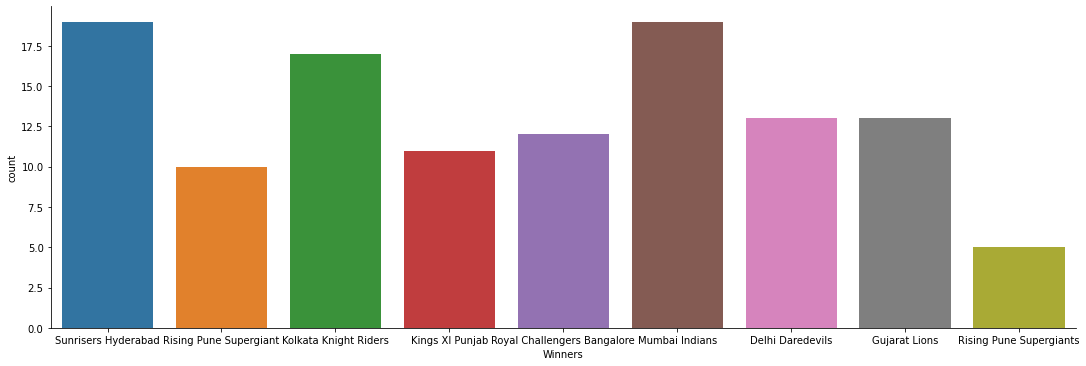

In [31]:
fig = sb.catplot("Winner",data=df,kind='count',aspect=3)
fig.set_xlabels("Winners")

c:\python\python385\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


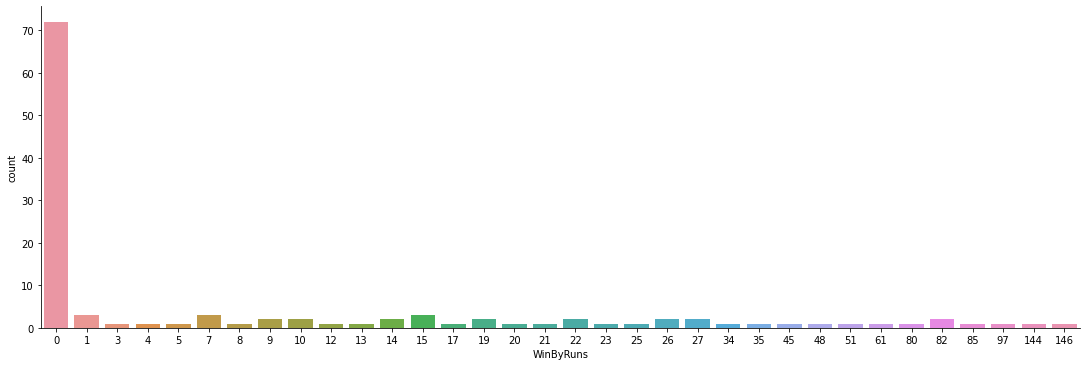

In [32]:
fig = sb.catplot("Win by runs",data=df,kind='count',aspect=3)
fig.set_xlabels("WinByRuns")

c:\python\python385\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


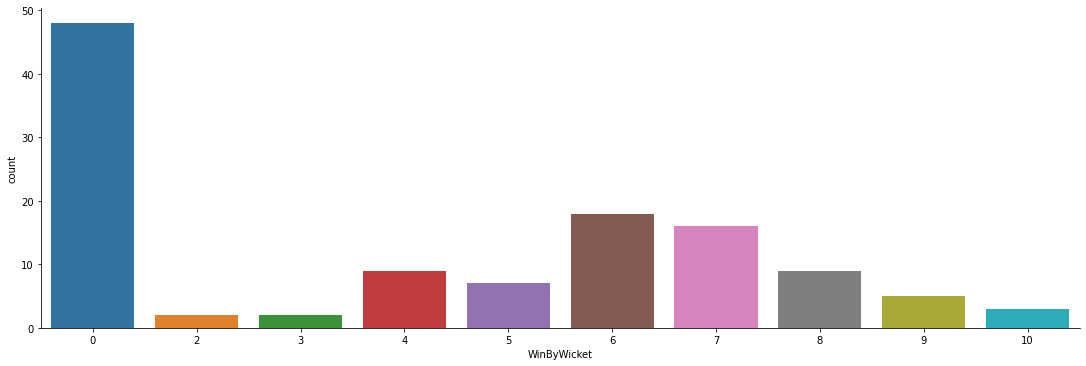

In [33]:
fig = sb.catplot("Win by wickets",data=df,kind='count',aspect=3)
fig.set_xlabels("WinByWicket")

In [35]:
df.groupby(["Toss winning tem","Winner"])["Toss winning tem"].count()

Toss winning tem             Winner                     
Delhi Daredevils             Delhi Daredevils               10
                             Gujarat Lions                   1
                             Kings XI Punjab                 1
                             Kolkata Knight Riders           1
                             Mumbai Indians                  3
Gujarat Lions                Gujarat Lions                  10
                             Kings XI Punjab                 2
                             Mumbai Indians                  1
                             Royal Challengers Bangalore     2
Kings XI Punjab              Kings XI Punjab                 2
                             Kolkata Knight Riders           1
                             Mumbai Indians                  1
                             Rising Pune Supergiants         1
                             Royal Challengers Bangalore     2
                             Sunrisers Hyderabad             

In [3]:
df.groupby(["City","Winner"])["City"].count()

NameError: name 'df' is not defined

c:\python\python385\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


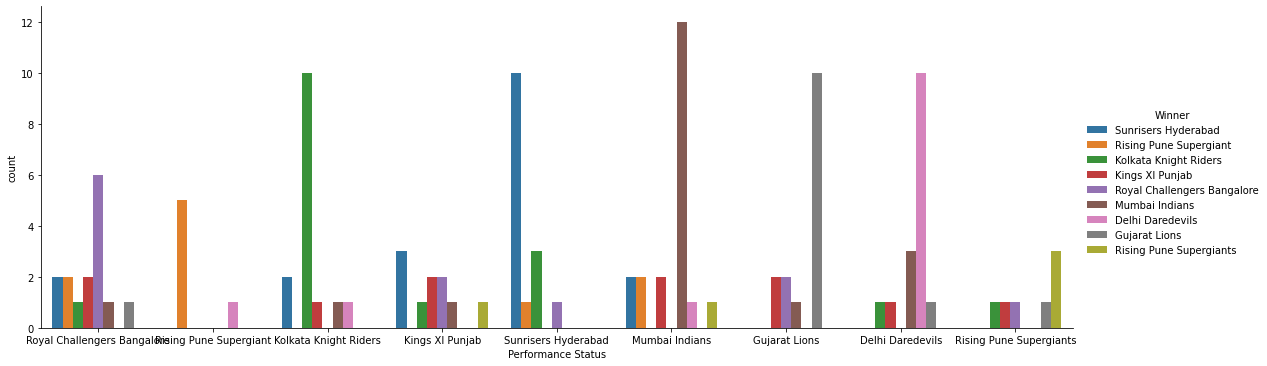

In [37]:
fig = sb.catplot("Toss winning tem",data=df,hue="Winner",kind='count',aspect=3)
fig.set_xlabels("Performance Status")

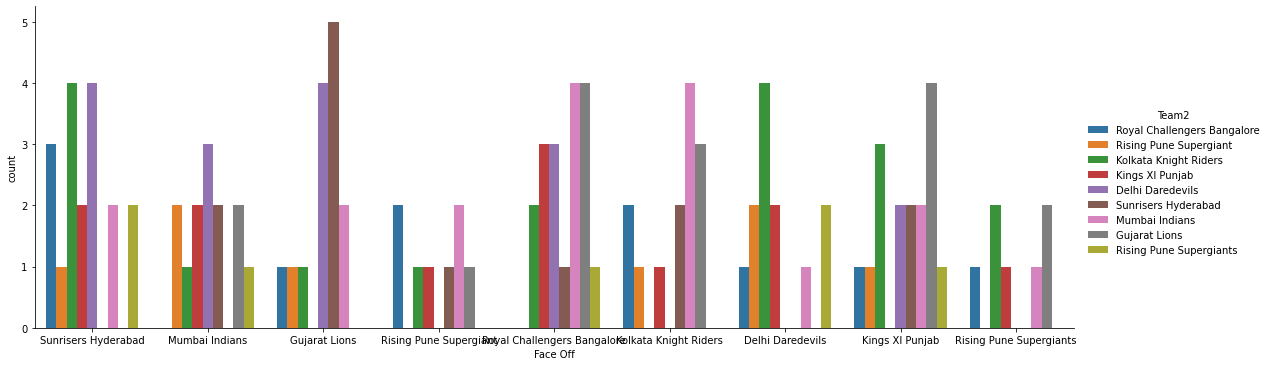

In [41]:
fig = sb.catplot("Team1",data=df,hue="Team2",kind='count',aspect=3)
fig.set_xlabels("Face Off")

In [42]:
toss_won_by_RCB = df[df["Toss winning tem"]  == "Royal Challengers Bangalore"]
len(toss_won_by_RCB)

15

In [43]:
toss_won_by_SRH = df[df["Toss winning tem"]  == "Sunrisers Hyderabad"]
len(toss_won_by_SRH)

15

c:\python\python385\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


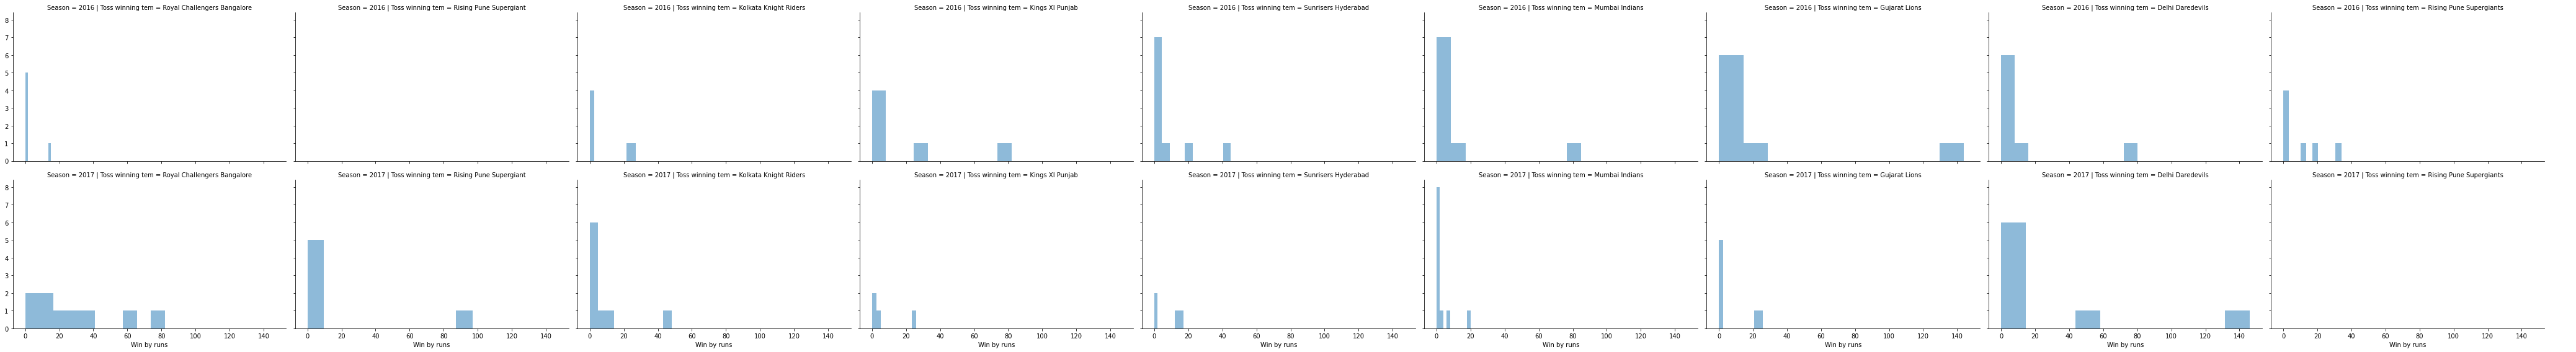

In [50]:
g = sb.FacetGrid(df, col='Toss winning tem', row='Season', size=4, aspect=1.6)
g.map(plt.hist, 'Win by runs', alpha =0.5, bins = 10)
g.add_legend();

In [55]:
df["Win by runs"].mean()

12.302521008403362

In [56]:
df["Win by wickets"].mean()

3.764705882352941

In [58]:
df["Win by wickets"].median()

4.0

In [60]:
df["Win by runs"].median()

0.0

In [61]:
df.mode()

,ID,Season,City,Date,Team1,Team2,Toss winning tem,Toss,Result,Dl_applied,Winner,Win by runs,Win by wickets,Player of match,Venue,Umpire1,Umpire2,Umpire3
0,1,2016.0,Bangalore,01-05-2016,Royal Challengers Bangalore,Kolkata Knight Riders,Mumbai Indians,field,normal,0.0,Mumbai Indians,0.0,0.0,RG Sharma,M Chinnaswamy Stadium,AK Chaudhary,CK Nandan,NaN
1,2,NaN,NaN,01-05-2017,Sunrisers Hyderabad,Mumbai Indians,NaN,NaN,NaN,NaN,Sunrisers Hyderabad,NaN,NaN,V Kohli,NaN,NaN,NaN,NaN
2,3,NaN,NaN,06-05-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,07-05-2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,07-05-2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df["Win by runs"].std()

26.416659683708954

In [63]:
df["Win by wickets"].std()

3.4091250489241944

In [64]:
df["Win by runs"].var()

697.839908844894

In [65]:
df["Win by wickets"].var()

11.622133599202392

In [67]:
df['Percentile Rank'] = df.Winner.rank(pct = True)
display(df)

,ID,Season,City,Date,Team1,Team2,Toss winning tem,Toss,Result,Dl_applied,Winner,Win by runs,Win by wickets,Player of match,Venue,Umpire1,Umpire2,Umpire3,Percentile Rank
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0.924370
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,0.659664
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,0.386555
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,0.268908
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,0.794118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,115,2016,Raipur,22-05-2016,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,6,V Kohli,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN,0.794118
115,116,2016,Bangalore,24-05-2016,Gujarat Lions,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,4,AB de Villiers,M Chinnaswamy Stadium,AK Chaudhary,HDPK Dharmasena,NaN,0.794118
116,117,2016,Delhi,25-05-2016,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN,0.924370
117,118,2016,Delhi,27-05-2016,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN,0.924370
